In [1]:
import algotrader as at
gAccount = 'RF5D03'
gSym = 'EURUSD'
gDtFrom = None
gDtTo = None

In [2]:
from datetime import timezone
from datetime import datetime
from datetime import timedelta
import time

# global time vars
gTimezoneUTC = timezone.utc
gTdOffset= timedelta(hours=2)   # TODO recognise me - summer time 3h and winter time 2h
gTicksPerPeriod = 36#36000  #  10hours * 36000secs/hours -> 36000 ticks per period
gTimeDelta = timedelta( hours=4 )   # TODO config var 10 hours -> related to 36000 (gTicksPerPeriod) elements for ticks array
#gDtTo   = datetime.now(gTimezoneUTC) + gTdOffset
gDtTo   = datetime(2025, 1, 3, 17, 2, 50, 0, tzinfo=gTimezoneUTC)
gDtFrom = gDtTo - gTimeDelta
print( "\nFrom: ", gDtFrom, " To: ", gDtTo )
gDtTo_epoch_ms = int(gDtTo.timestamp()*1000)
print( "\ngDtTo.timestamp() ", gDtTo.timestamp(), " gDtTo_epoch_ms: ", gDtTo_epoch_ms)



From:  2025-01-03 13:02:50+00:00  To:  2025-01-03 17:02:50+00:00

gDtTo.timestamp()  1735923770.0  gDtTo_epoch_ms:  1735923770000


In [3]:
gH = at.Algotrader(gAccount)
gH.mt5_init()

True

In [4]:
# analyse a singe data frame
gH.get_date_range(gDtTo)
gH.get_ticks_and_rates( gSym )

In [5]:
gH.analyse_df( gSym )


,sec,vol,cnt,t1,t0,dt_to,c1,c0,DELTA,OC,HL,TD,VOLS,TT,HL/TD,HL/VOLS,SUMCOL
T1,0.0,1.0,10.0,1735923764271,1735923769869,1735923770000,1.029740,1.02975,0,0,2,5,10,500,0.4,0.2,0.6
T5,0.0,5.0,10.0,1735923747086,1735923767053,1735923770000,1.029660,1.02975,0,8,18,22,50,440,0.8,0.4,1.2
T15,0.0,15.0,10.0,1735923724782,1735923762382,1735923770000,1.029540,1.02975,0,21,36,45,150,300,0.8,0.2,1.0
T30,0.0,30.0,10.0,1735923685199,1735923755182,1735923770000,1.029660,1.02975,0,8,39,84,300,280,0.5,0.1,0.6
T60,0.0,60.0,10.0,1735923620046,1735923745262,1735923770000,1.029510,1.02975,0,24,95,149,600,248,0.6,0.2,0.8
T300,0.0,300.0,10.0,1735922266573,1735923685199,1735923770000,1.029710,1.02975,0,4,121,1503,3000,501,0.1,0.0,0.1
T900,0.0,900.0,10.0,1735918502775,1735923555438,1735923770000,1.029970,1.02975,0,-22,143,5267,9000,585,0.0,0.0,0.0
T3600,0.0,3600.0,10.0,1735898546946,1735921933325,1735923770000,1.027870,1.02975,0,187,298,25223,36000,701,0.0,0.0,0.0
SUMROW,0.0,613.0,10.0,1735919732209,1735923496713,1735923770000,1.029457,1.02975,0,28,94,4037,6138,444,0.4,0.1,0.5


In [42]:
gH.run_analyse( gDtTo, gSym )

,sec,vol,cnt,t1,t0,dt_to,c1,c0,DELTA,OC,HL,TD,VOLS,TT,HL/TD,HL/VOLS,SUMCOL
T1,0.0,1.0,10.0,1735923764271,1735923769869,1735923770000,1.029740,1.02975,187,0,2,5,10,500,0.4,0.2,0.6
T5,0.0,5.0,10.0,1735923747086,1735923767053,1735923770000,1.029660,1.02975,187,8,18,22,50,440,0.8,0.4,1.2
T15,0.0,15.0,10.0,1735923724782,1735923762382,1735923770000,1.029540,1.02975,187,21,36,45,150,300,0.8,0.2,1.0
T30,0.0,30.0,10.0,1735923685199,1735923755182,1735923770000,1.029660,1.02975,187,8,39,84,300,280,0.5,0.1,0.6
T60,0.0,60.0,10.0,1735923620046,1735923745262,1735923770000,1.029510,1.02975,187,24,95,149,600,248,0.6,0.2,0.8
T300,0.0,300.0,10.0,1735922266573,1735923685199,1735923770000,1.029710,1.02975,187,4,121,1503,3000,501,0.1,0.0,0.1
T900,0.0,900.0,10.0,1735918502775,1735923555438,1735923770000,1.029970,1.02975,187,-22,143,5267,9000,585,0.0,0.0,0.0
T3600,0.0,3600.0,10.0,1735898546946,1735921933325,1735923770000,1.027870,1.02975,187,187,298,25223,36000,701,0.0,0.0,0.0
SUMROW,0.0,613.0,10.0,1735919732209,1735923496713,1735923770000,1.029457,1.02975,187,28,94,4037,6138,444,0.4,0.1,0.5


In [43]:
# live  modus
#gH.set_gc0()

# analysis modus
df = gH.get_df_rates( gDtTo, 'T3600', gSym )
gH.g_c0[gSym] = df.iloc[0].close
#gH.set_gc0_price( gSym, df.iloc[0].close )
print(df.iloc[0].close)



1.02787


In [44]:
# same as above with different output
dfana = gH.run_analyse( gDtTo, 'EURUSD' )
gH.print_analyse_df( dfana )

        DELTA   OC   HL     TD   VOLS   TT  HL/TD  HL/VOLS  SUMCOL
T1        187    0    2      5     10  500    0.4      0.2     0.6
T5        187    8   18     22     50  440    0.8      0.4     1.2
T15       187   21   36     45    150  300    0.8      0.2     1.0
T30       187    8   39     84    300  280    0.5      0.1     0.6
T60       187   24   95    149    600  248    0.6      0.2     0.8
T300      187    4  121   1503   3000  501    0.1      0.0     0.1
T900      187  -22  143   5267   9000  585    0.0      0.0     0.0
T3600     187  187  298  25223  36000  701    0.0      0.0     0.0
SUMROW    187   28   94   4037   6138  444    0.4      0.1     0.5


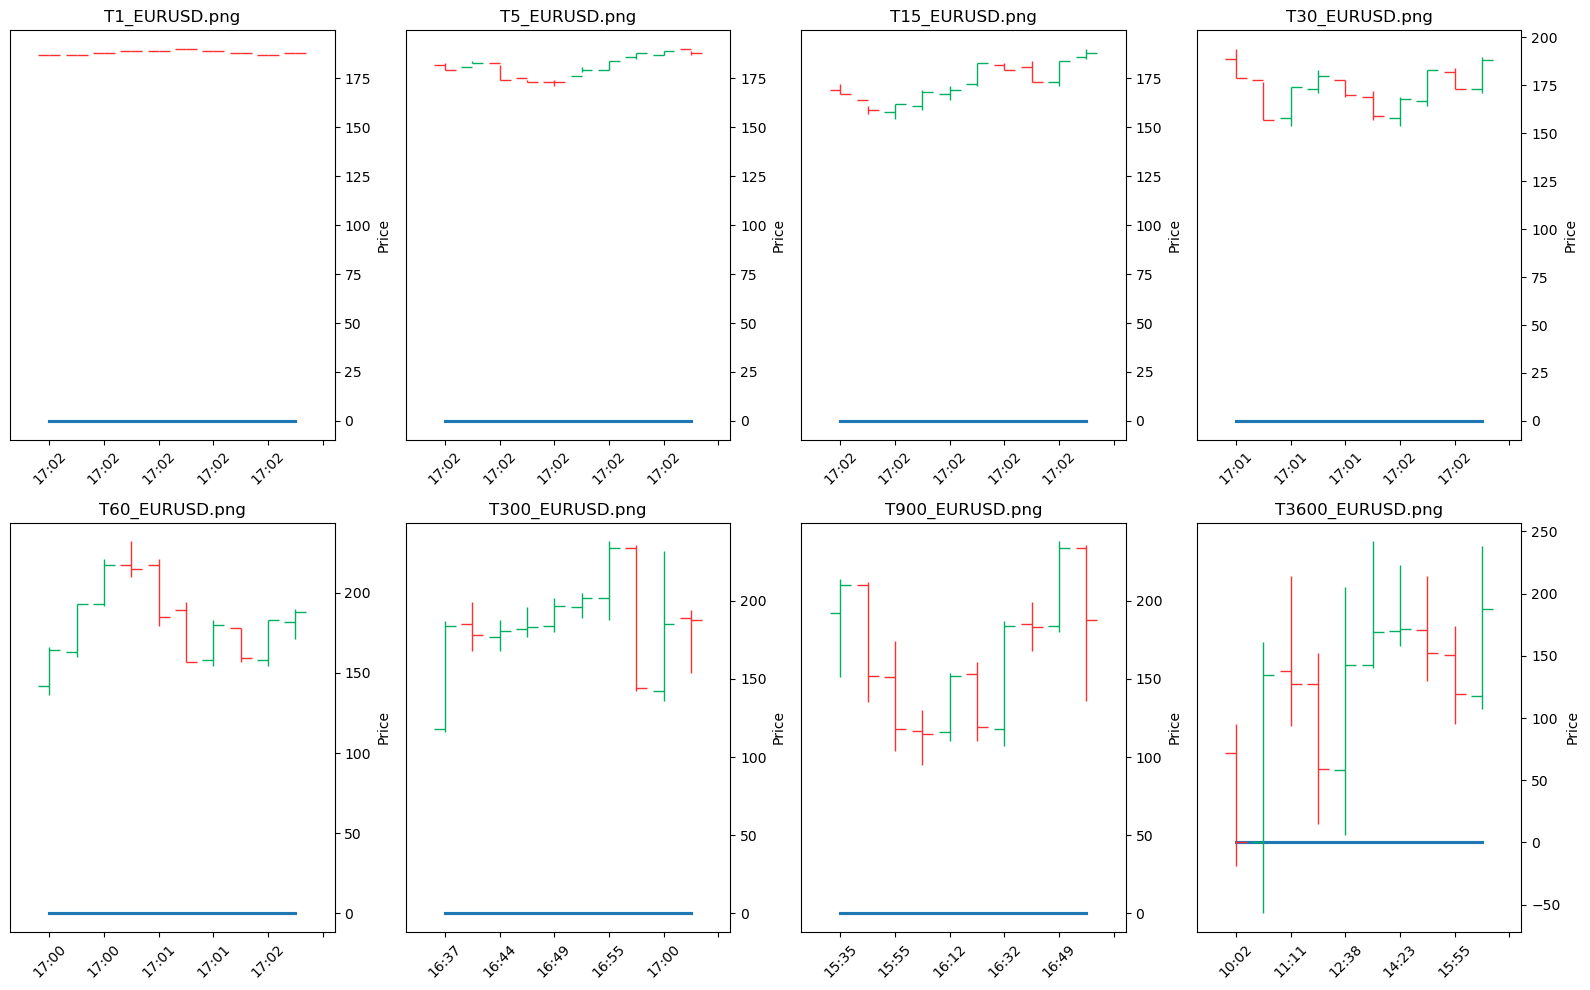

In [45]:
gH.print_fig_all_periods_per_sym()


        DELTA   OC   HL     TD   VOLS   TT  HL/TD  HL/VOLS  SUMCOL
T1        187    0    2      5     10  500    0.4      0.2     0.6
T5        187    8   18     22     50  440    0.8      0.4     1.2
T15       187   21   36     45    150  300    0.8      0.2     1.0
T30       187    8   39     84    300  280    0.5      0.1     0.6
T60       187   24   95    149    600  248    0.6      0.2     0.8
T300      187    4  121   1503   3000  501    0.1      0.0     0.1
T900      187  -22  143   5267   9000  585    0.0      0.0     0.0
T3600     187  187  298  25223  36000  701    0.0      0.0     0.0
SUMROW    187   28   94   4037   6138  444    0.4      0.1     0.5


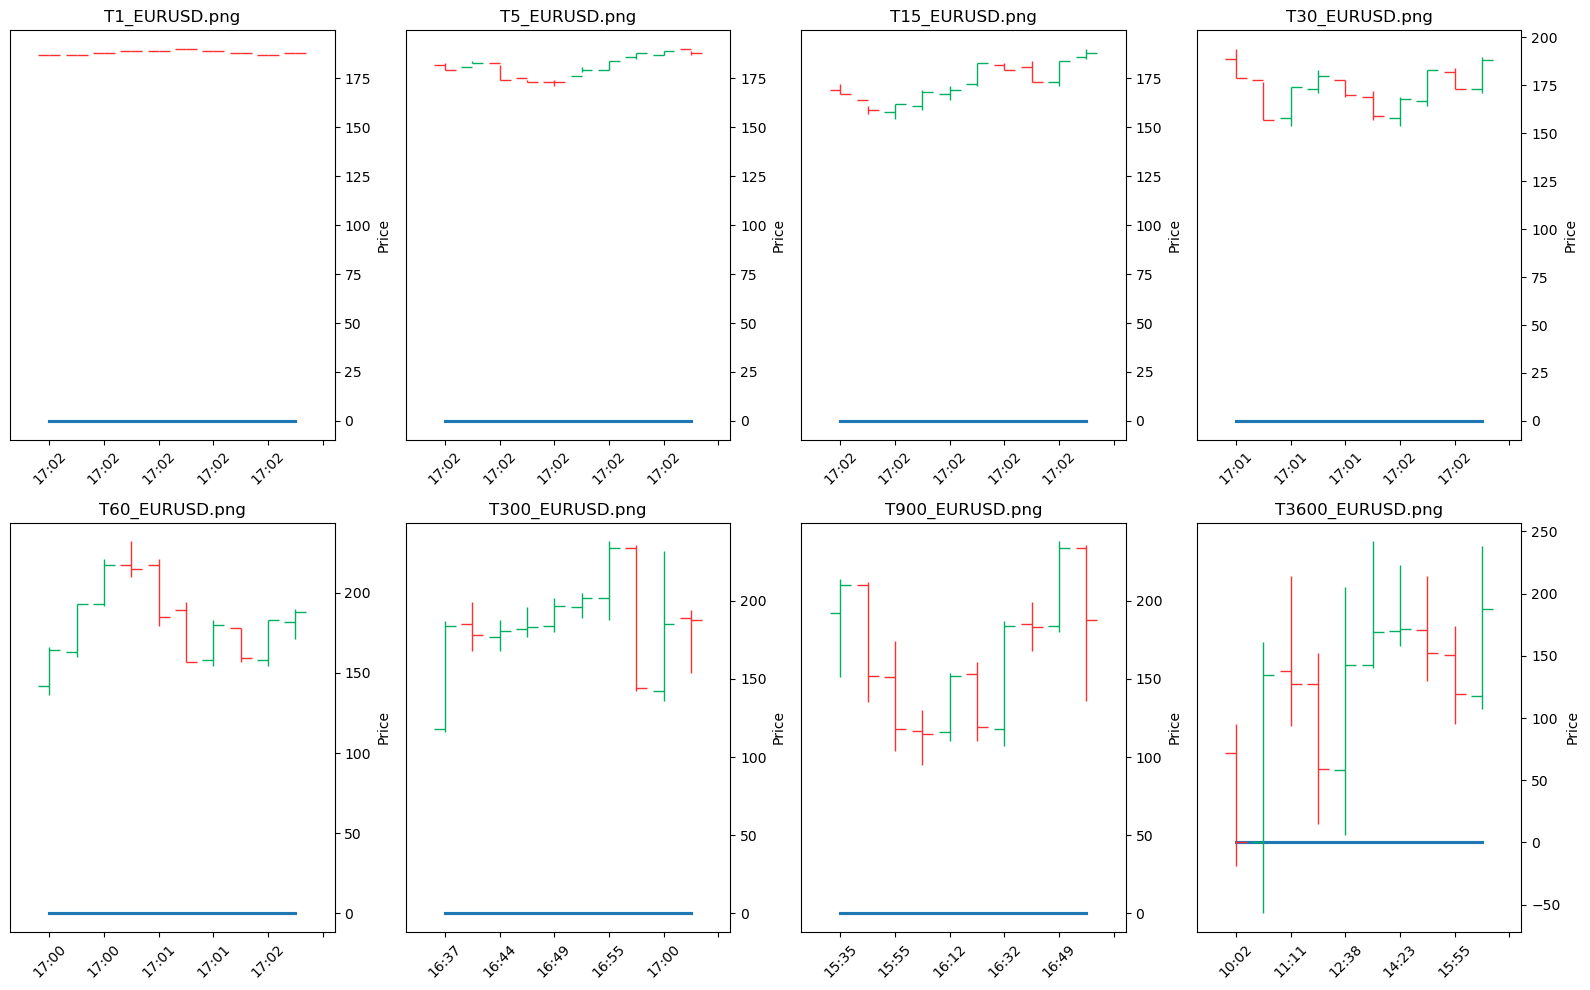

In [46]:
gH.run_now( gDtTo, gSym )